In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.optimize import curve_fit as cv
import numpy as np
# import library
import pickle

In [3]:
# open the file of interest, and use pickle loading
infile = open ("Sample_pt_250_500/qcd_100000_pt_250_500.pkl",'rb')
qcd_data = pickle.load(infile)
higgs_data = pickle.load(open ("Sample_pt_250_500/higgs_100000_pt_250_500.pkl",'rb'))

# list all keys of the files
print(qcd_data.keys())
higgs_data.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [4]:
def histograms(var, name, units):
    plt.rcParams["figure.figsize"] = (40,50)  
    fig, ax = plt.subplots(2, 2)
    # Higgs data | log Higgs
    # ----------------------
    # QCD data  | log QCD
    higgs_hist = ax[0, 0]
    higgs_log = ax[0, 1]
    qcd_hist = ax[1, 0]
    qcd_log = ax[1, 1]


    a = higgs_hist.hist(higgs_data.get(var), density = True, bins = 50, alpha = 0.6)
    higgs_hist.set_title(name + ' for Higgs data set')
    higgs_hist.set_xlabel(name + units)
    higgs_hist.set_ylabel('frequency')

    b = higgs_log.hist(higgs_data.get(var), density = True, bins = 50, alpha = 0.8)
    higgs_log.set_title('Log of ' + name + ' for Higgs data set')
    higgs_log.set_yscale('log')
    higgs_log.set_xlabel(name + units)
    higgs_log.set_ylabel('log(frequency)')

    c = qcd_hist.hist(qcd_data.get(var), density = True, bins = 50, color = 'r', alpha = 0.6)
    qcd_hist.set_title(name + ' for QCD data set')
    qcd_hist.set_xlabel(name + units)
    qcd_hist.set_ylabel('frequency')

    d = qcd_log.hist(qcd_data.get(var), density = True, bins = 50, color = 'r', alpha = 0.8)
    qcd_log.set_title('Log of ' + name + ' for QCD data set')
    qcd_log.set_yscale('log')
    qcd_log.set_xlabel(name + units)
    qcd_log.set_ylabel('log(frequency)')
    
    for plot in [higgs_hist, higgs_log, qcd_hist, qcd_log]:
        plot.title.set_fontsize(48)
        for item in ([plot.xaxis.label, plot.yaxis.label] + plot.get_xticklabels() + plot.get_yticklabels()):
            item.set_fontsize(36)

# Lab 6
> For the LHC data, we are going to have to fake a background. Make a Poisson background with mean 100. 

In [73]:
poisson_background = stats.poisson.rvs(mu=100, size = 10000)

## Problem 1
> The first problem is to look at your background distribution and determine where the $5\sigma$ sensitivity threshold is.

In [74]:
# first, find the probability corrosponding to 5 sigma
five_sigma_prob = stats.norm.cdf(5)
# calculate where that cutoff falls in our background
cut_off = stats.poisson.ppf(five_sigma_prob, 100)
print('5-sigma cut off: ',cut_off)

5-sigma cut off:  154.0


## Problem 2
> Now create a set of injected (simulated) signals of a single strength. You will want to make your signal moderately strong, say somewhere in the 8-30 $5\sigma$ range. Inject this signal into your background data many times.

I'm going to create a signal of strength $8 \sigma$ and add 100 samples of this to my background.

In [75]:
twenty_sigma_prob = stats.norm.cdf(8)
twenty_sigma_value = stats.poisson.ppf(twenty_sigma_prob, 100)
print('20-sigma cut off: ',twenty_sigma_value)

one_signal = poisson_background.copy()

for times in range(100):
    one_signal = np.append(one_signal, twenty_sigma_value)

20-sigma cut off:  190.0


> a) Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.

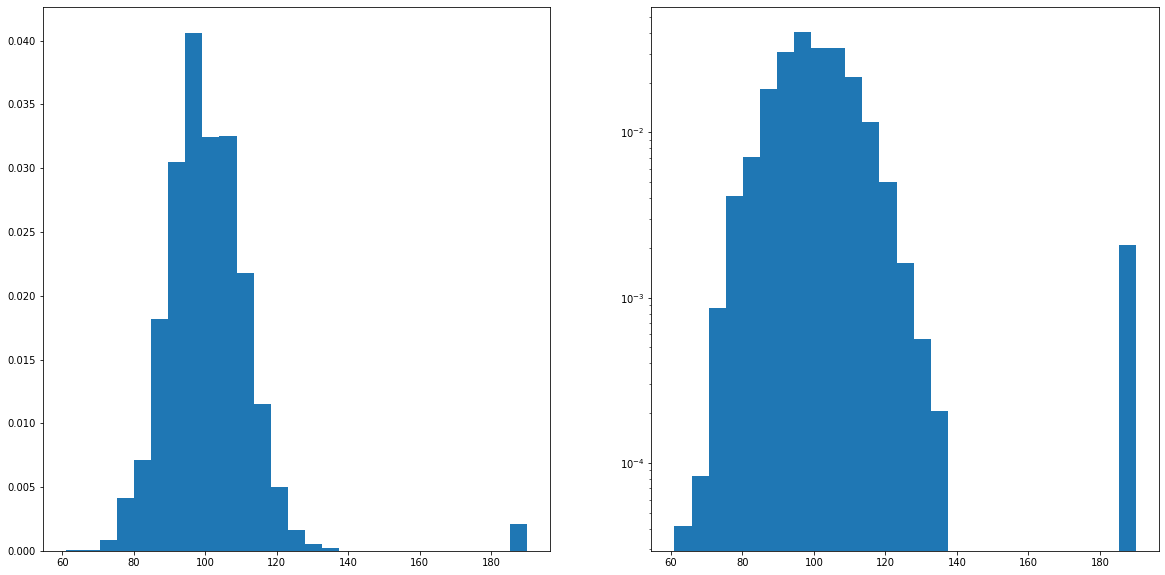

In [76]:
plt.rcParams["figure.figsize"] = (20,10)  
fig, ax = plt.subplots(1, 2)


hist = ax[0].hist(one_signal, density=True, bins = 27)
log_hist = ax[1].hist(one_signal, density=True, bins = 27)
ax[1].set_yscale('log')

When the $\mu$ for a Poisson distribution is high, it tends to look like a normal distribution.  What we can see from this histogram is that there is an extreme outlier to the right of the distribution.

> b) Is your observed signal biased? (e.g. is the observed value equally likely to be stronger or weaker than the true injected signal?) Is it symmetric?

Yes, the observed signal is biased because it is much more likely to observe a value less than our signal than greater than our signal.  It is not symmetric via the same logic.

## Problem 3

> Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above $5 \sigma$ ($30 \sigma$ or more).

> a) Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed signal

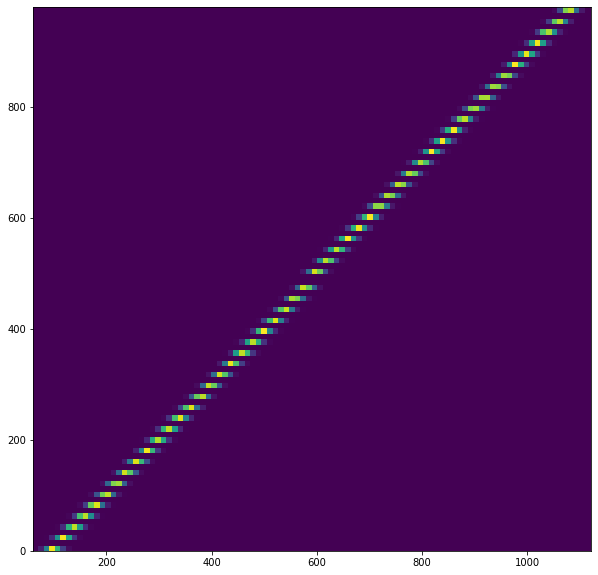

In [2]:
injected_signals = range(0, 1000)

x = []
y = []

for signal in injected_signals:
    for times in range(1000):
        x.append(stats.poisson.rvs(mu=100) + signal)
        y.append(signal)

plt.rcParams["figure.figsize"] = (10,10)  
fig, ax = plt.subplots(1, 1)

hist = ax.hist2d(x, y,bins=100)